
## Overview
This project consists in the analysis of data between historical life expectancy and gdp data from certain countries. 

The goal is to observe the data in ordser ot reach meaningfull conlcusions regarding possible correlations between the observed data and make conclusionsn about such behaviour. 

**Data sources**

The dataset `all_datya.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

### Import libraries
The libraries that are expected to be used during this project are loaded in the following code

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

### Data Exploration
In the folloiwing code the dataset is stored adn a brief summary is conducted to understand our variables.

From the dataset it can be seen that the variables:
- **Country**: refers directly to the country from where the observation is taken.

- **Year**: is quite straighforward as well, referring to the year whom the observation is taken.

- **Life expectancy at birth (years)**: is a statistical measure of the estimate of the average remaining years of life at a given age. This is the most commonly used measure as life quality within a country.

- **GDP**: is the gross domestic product which means the total monetary or market value of all the finished goods and services produced within a country's borders in a specific time period. Basically this can be used as an indicator of wealthiness and development between countries.

Additionally from the output of the following code, we are dealing with a dataset of 96 observations withouty any null values which overall (at first glance) is a good signal because the process of dealing with missing data can be skipped. 

In [4]:
df = pd.read_csv('all_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


Let's find out the countries involved in the dataset.

In [7]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

Furthermore, the time horizons of the observations are going to be computed.

The result tells us that the data is recorded from 2000 and the last recording is taken out in 2015 for every country

In [23]:
print(df.groupby(['Country']).Year.min(),  df.groupby(['Country']).Year.max())


Country
Chile                       2000
China                       2000
Germany                     2000
Mexico                      2000
United States of America    2000
Zimbabwe                    2000
Name: Year, dtype: int64 Country
Chile                       2015
China                       2015
Germany                     2015
Mexico                      2015
United States of America    2015
Zimbabwe                    2015
Name: Year, dtype: int64


### Data Analysis
The first step is to visualize the gpd and life expectancy in order to observe possible patterns and determine if further analysis should be carried out to gather quantitative data from the relationships we observe.

Therefore, the code below creates 6 scatterplots of a country's life expectancy againts its gdp historical data. Note that there's a tendency of a positive correlation from osberving the datapoints from the scatterplot.

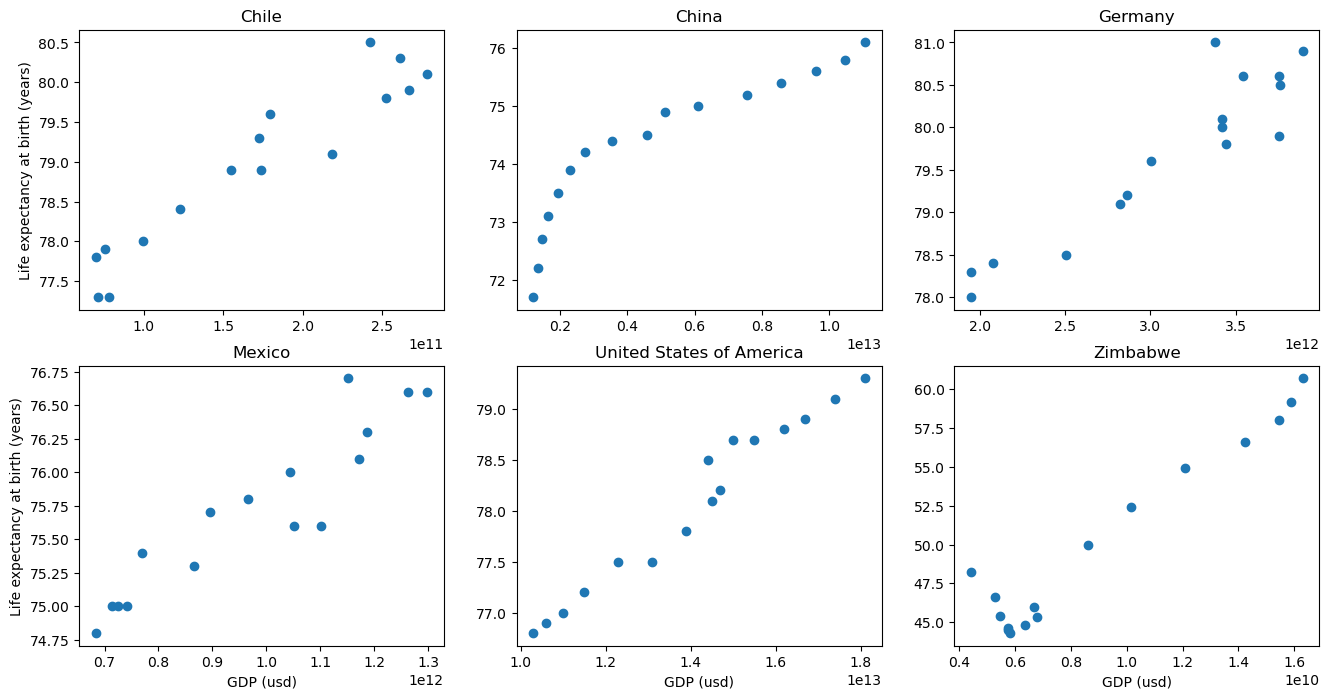

In [82]:
fig_size = [16, 8]
fig, ax = plt.subplots(2, 3, figsize=fig_size)
k = 0
for i in range(0, 2):
    for j in range(0,3) :
        country_name = df.Country.unique()[k]
        country_df = df[df['Country'] == country_name]
        life_exp = country_df['Life expectancy at birth (years)']
        gdp = country_df['GDP']
        ax[i,j].scatter(gdp, life_exp)
        ax[i,j].set_title(country_name)
        if j == 0 :
            ax[i,j].set_ylabel('Life expectancy at birth (years)')
        if i == 1 :
            ax[i,j].set_xlabel('GDP (usd)')
        k += 1

In [94]:
for i in range(0,6) :
    country_name = df.Country.unique()[i]
    country_df = df[df['Country'] == country_name]
    life_exp = country_df['Life expectancy at birth (years)']
    gdp = country_df['GDP']
    r, p_val = sp.stats.pearsonr(gdp, life_exp)
    print(f'{country_name}\'s pearson correlation: {r}')

Chile's pearson correlation: 0.9498766659254413
China's pearson correlation: 0.9085255408648356
Germany's pearson correlation: 0.932698898256127
Mexico's pearson correlation: 0.932237716784708
United States of America's pearson correlation: 0.9817092382430257
Zimbabwe's pearson correlation: 0.9661998955858779
